<h1> Paper Producer 2: Actually running etsfit on the data </h1>

Created: 1/19/23

Updated: 5/23/23
    
Author: Lindsey Gordon

In [1]:
import os
import numpy as np
import pandas as pd
from etsfit import etsfit
import etsfit.utils.utilities as ut

<h2> Step 1: Downloading data </h2>

I've included a csv file in this folder of the 10 targets used in the paper's TNS info. 

In [2]:
file = "tns_10.csv"
sn_list = ["2018exc", "2018fhw", "2018fub", "2020tld", "2020zbo", "2018hzh", "2020hvq", 
          "2020hdw", "2020bj", "2019gqv"]

df = pd.read_csv(file)
df

,Unnamed: 0,level_0,index,ID,Name,RA,DEC,Obj. Type,Redshift,Host Name,...,TNS AT,Public,End Prop. Period,Discovery Mag/Flux,Discovery Filter,Discovery Date (UT),Sender,Remarks,Ext. catalog/s,Sector
0,0,5,39,29346,SN 2018fub,00:40:30.760,-50:41:15.36,SN Ia,0.028800,2MASX J00403068-5041153,...,1,1,NaN,17.300,g-Sloan,2018-09-05 06:14:24.000,Stanek,NaN,NaN,2
1,1,10,84,70472,SN 2020zbo,03:22:16.063,-33:49:17.95,SN Ia,0.043270,WISEA J032216.20-334917.9,...,1,1,NaN,17.000,g-Sloan,2020-11-06 06:43:12.000,Vallely,NaN,NaN,31
2,2,13,101,29028,SN 2018fhw,04:18:06.200,-63:36:56.41,SN Ia,0.017000,2MASX J04180598-6336523,...,1,1,NaN,16.800,V-Johnson,2018-08-21 07:26:24.000,Vallely,NaN,NaN,1
3,3,14,103,28747,SN 2018exc,21:00:08.018,-40:21:30.94,SN Ia,0.057000,NaN,...,1,1,NaN,17.869,cyan-ATLAS,2018-08-11 10:13:26.000,ATLAS_Bot1,NaN,NaN,1
4,4,17,141,58415,SN 2020hvq,16:46:34.860,+62:49:36.80,SN Ia,0.019043,NaN,...,1,1,NaN,17.348,cyan-ATLAS,2020-04-21 13:24:57.600,ATLAS_Bot1,NaN,NaN,24
5,5,18,146,30851,SN 2018hzh,04:07:12.870,-37:03:10.44,SN Ia,0.035000,NaN,...,1,1,NaN,17.754,orange-ATLAS,2018-11-05 12:48:57.000,ATLAS_Bot1,NaN,NaN,4
6,6,30,248,57899,SN 2020hdw,16:00:51.990,+56:21:09.00,SN Ia,0.060000,NaN,...,1,1,NaN,17.460,r-ZTF,2020-04-14 10:39:20.736,ZTF_AMPEL_COMPLETE,NaN,NaN,23
7,7,32,277,66600,SN 2020tld,00:29:41.590,-51:32:09.60,SN Ia,0.011201,ESO 194- G 021,...,1,1,NaN,17.000,g-Sloan,2020-09-15 23:45:36.000,Stanek,NaN,NaN,29
8,8,33,309,51543,SN 2020bj,16:58:25.350,+68:13:56.71,SN Ia,0.050000,WISEA J165825.34+681357.4,...,1,1,NaN,17.799,r-ZTF,2020-01-02 12:17:00.000,ALeRCE,NaN,NaN,20
9,9,35,321,38522,SN 2019gqv,07:50:19.060,-72:52:35.26,SN Ia,0.017000,ESO 035- G 017,...,1,1,NaN,16.700,g-Sloan,2019-06-01 17:45:36.000,Stanek,NaN,NaN,12


In [3]:
# download via tessreduce: 
# data_dir = "/Users/lindseygordon/research/urop/tessreduce_lc/"
# cdir = "/Users/lindseygordon/.lightkurve-cache/tesscut/" # this is where tesscut files will end up
# #you need to specify it so it can delete them because they're huge
# ut.tr_downloader(file, data_dir, cdir)

<h2> Step 2: Section 4.1 in paper </h2>

In [3]:
import etsfit.utils.pipeline as pipe
# run type 1 fitting for all present datasets
save_dir = "/Users/lindseygordon/research/paper_outputs/4-1-60-run/"
data_dir = "/Users/lindseygordon/research/urop/tessreduce_lc/"
pipe.run_all_fits(fitType=1, data_dir=data_dir, save_dir=save_dir, TNSFile=file,
                 filekey = "-tessreduce",
                 goodList=sn_list, cbv_dir=None, quaternion_raw_dir=None,
                 quaternion_txt_dir=None, 
                 fraction=0.6, binning=False, n1=10000, n2=40000)

2021bnd 34 1 2
2020tld 29 2 1
saving into folder:  /Users/lindseygordon/research/paper_outputs/4-1-60-run/2020tld2921/singlepower-0.6/


 25%|█████████▎                           | 10000/40000 [02:21<07:04, 70.66it/s]


2020flg 23 1 4
2019axj 08 1 2
2018eod 29 2 1
2021egg 35 1 2
2018jwi 06 3 4
2021bsp 17 1 4
2018fzi 02 1 2
2018grv 02 1 4
2018emt 01 1 3
2018hsz 04 3 3
2021gwn 36 2 4
2018hpu 04 3 2
2018hkx 03 4 2
2018hzh 04 3 1
saving into folder:  /Users/lindseygordon/research/paper_outputs/4-1-60-run/2018hzh0431/singlepower-0.6/


 38%|█████████████▉                       | 15000/40000 [02:45<04:36, 90.39it/s]


2020dcs 22 2 4
2020axk 21 2 2
2020aesr 31 2 2
2020yzo 31 4 3
2020abdk 32 1 2
2018jnd 05 2 3
2018jjd 05 2 1
2020cxe 21 4 4
2020npk 26 1 2
2019bea 07 4 4
2020jxq 25 2 4
2018hka 03 1 4
2020eyf 23 1 2
2020xyw 19 3 2
2021hup 31 4 4
2020ygv 31 4 4
2020yzw 31 1 3
2020abcr 32 3 2
2020zbo 31 2 1
saving into folder:  /Users/lindseygordon/research/paper_outputs/4-1-60-run/2020zbo3121/singlepower-0.6/


 22%|████████▎                            | 9000/40000 [01:24<04:50, 106.63it/s]


2018hkb 03 1 3
2020hvq 24 2 2
saving into folder:  /Users/lindseygordon/research/paper_outputs/4-1-60-run/2020hvq2422/singlepower-0.6/


 28%|█████████▉                          | 11000/40000 [01:21<03:34, 135.23it/s]


2018eph 01 4 1
2018fqn 02 1 4
2019ako 06 4 1
2019bxi 07 3 2
2020aakp 15 2 1
2020xyw 31 4 4
2018fvi 07 4 4
2021bzm 34 1 1
2019dke 10 1 2
2020fqi 23 3 4
2018fwi 02 1 1
2018fub 02 2 1
saving into folder:  /Users/lindseygordon/research/paper_outputs/4-1-60-run/2018fub0221/singlepower-0.6/


 28%|█████████▉                          | 11000/40000 [01:22<03:36, 134.13it/s]


2019nud 15 1 1
2020vem 30 1 2
2020hfk 07 1 4
2019aba 05 3 2
2020abqy 15 1 4
2021iff 34 1 1
2018hib 03 2 2
2020kte 25 1 1
2020aek 20 3 4
2018jmt 05 4 1
2018hyy 04 1 4
2018evo 01 1 1
2020qdi 27 1 2
2021adu 33 3 2
2021dqa 35 1 2
2021bix 34 2 2
2018hdo 03 3 4
2021iff 37 3 3
2020vbs 30 1 1
2020zqo 23 1 1
2020hfk 11 1 1
2020hdw 23 3 3
saving into folder:  /Users/lindseygordon/research/paper_outputs/4-1-60-run/2020hdw2333/singlepower-0.6/


 22%|████████▎                            | 9000/40000 [01:07<03:51, 134.07it/s]


2021eng 35 1 3
2020tap 29 1 4
2018exc 01 1 1
saving into folder:  /Users/lindseygordon/research/paper_outputs/4-1-60-run/2018exc0111/singlepower-0.6/


 18%|██████▍                              | 7000/40000 [00:54<04:16, 128.61it/s]


2019xhk 19 3 2
2020tn 20 1 3
2020aakp 31 4 3
2019pdx 15 2 1
2019ekn 11 1 1
2020uvg 30 1 1
2018eod 01 1 4
2018fvi 02 3 3
2018fhw 01 4 1
saving into folder:  /Users/lindseygordon/research/paper_outputs/4-1-60-run/2018fhw0141/singlepower-0.6/


 75%|███████████████████████████         | 30000/40000 [04:25<01:28, 113.15it/s]


2019sqj 17 1 4
2020awr 21 3 2
2020abjl 32 2 3
2021hfq 36 4 1
2020fcw 23 2 4
2020azn 21 1 2
2021bpo 23 1 3
2018itr 04 3 3
2020wux 30 1 1
2020ftl 19 3 2
2018huc 04 1 1
2019gqv 12 4 2
saving into folder:  /Users/lindseygordon/research/paper_outputs/4-1-60-run/2019gqv1242/singlepower-0.6/


 30%|██████████▊                         | 12000/40000 [01:17<03:01, 153.91it/s]


2021asu 34 1 2
2019wjl 08 1 3
2019wjl 19 3 2
2019wla 18 1 1
2020bj 20 4 2
saving into folder:  /Users/lindseygordon/research/paper_outputs/4-1-60-run/2020bj2042/singlepower-0.6/


 32%|███████████▋                        | 13000/40000 [01:30<03:07, 144.27it/s]


2020abqu 32 2 4
2021epv 35 1 2
2020acaa 32 3 2
2020jtg 24 3 1
2020swy 29 2 2


# 3: Big paper plots of fitting: 

2020tld 29 2 1
2020zbo 31 2 1
2018fub 02 2 1
2018exc 01 1 1
2018fhw 01 4 1


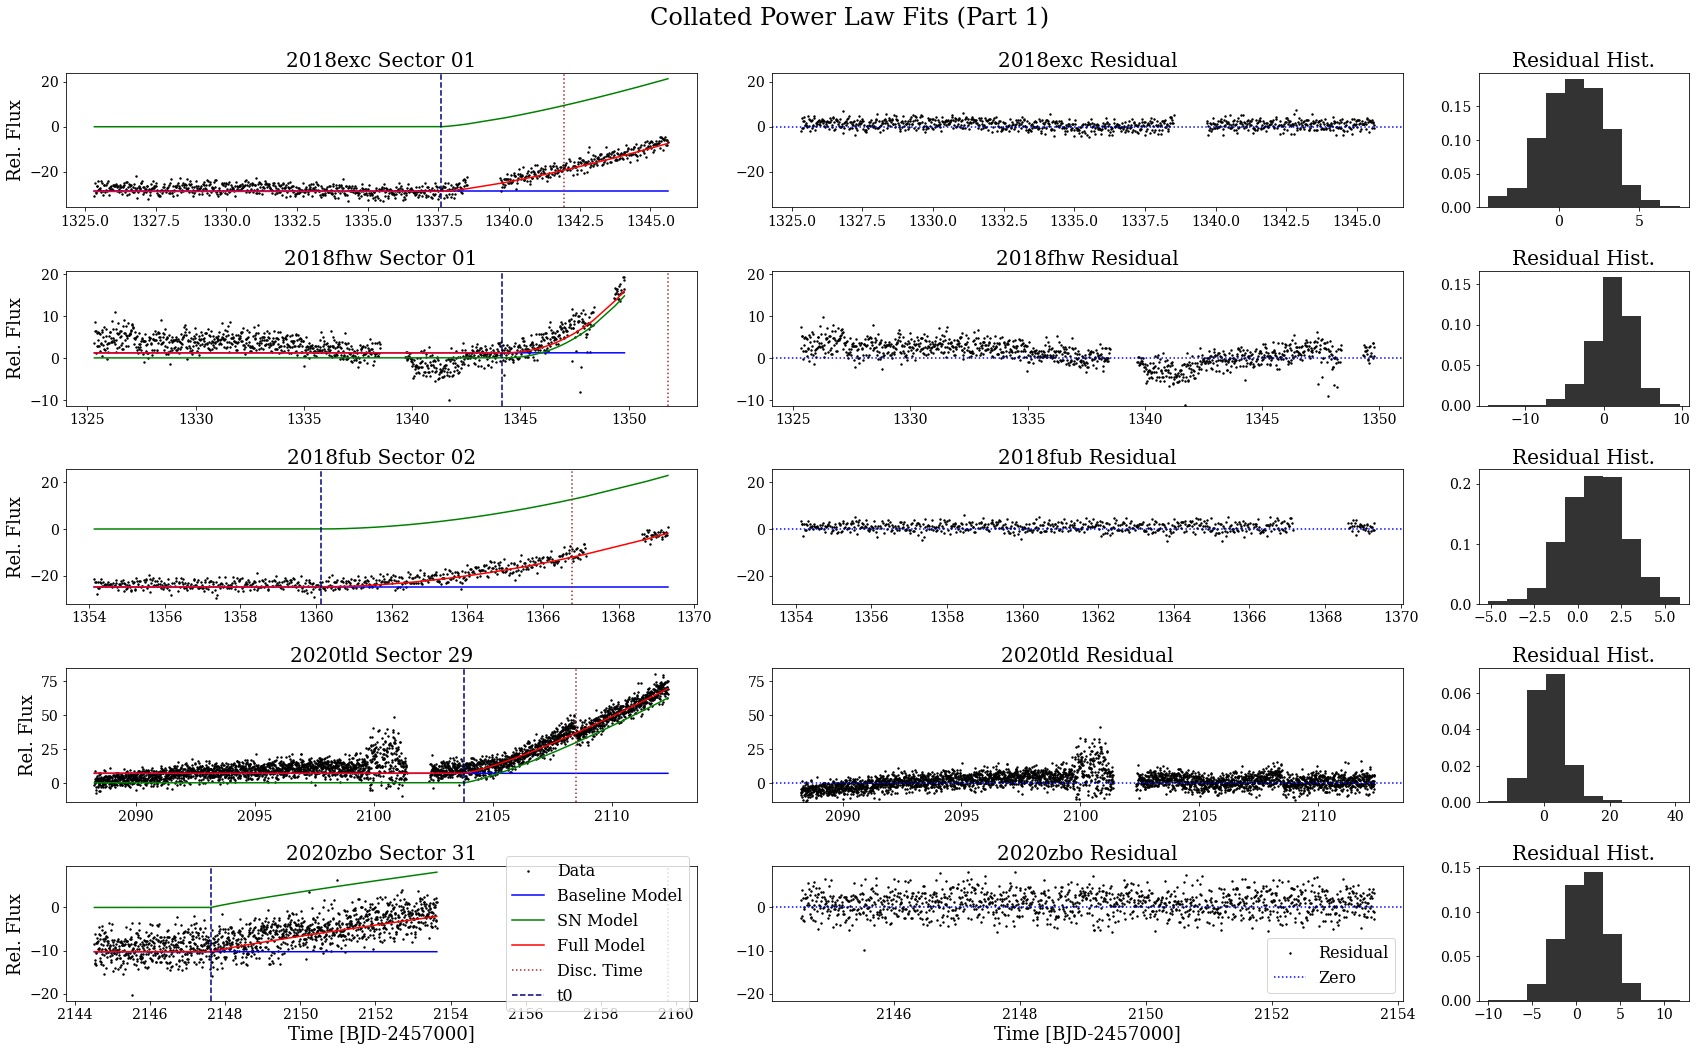

2018hzh 04 3 1
2020hvq 24 2 2
2020hdw 23 3 3
2019gqv 12 4 2
2020bj 20 4 2


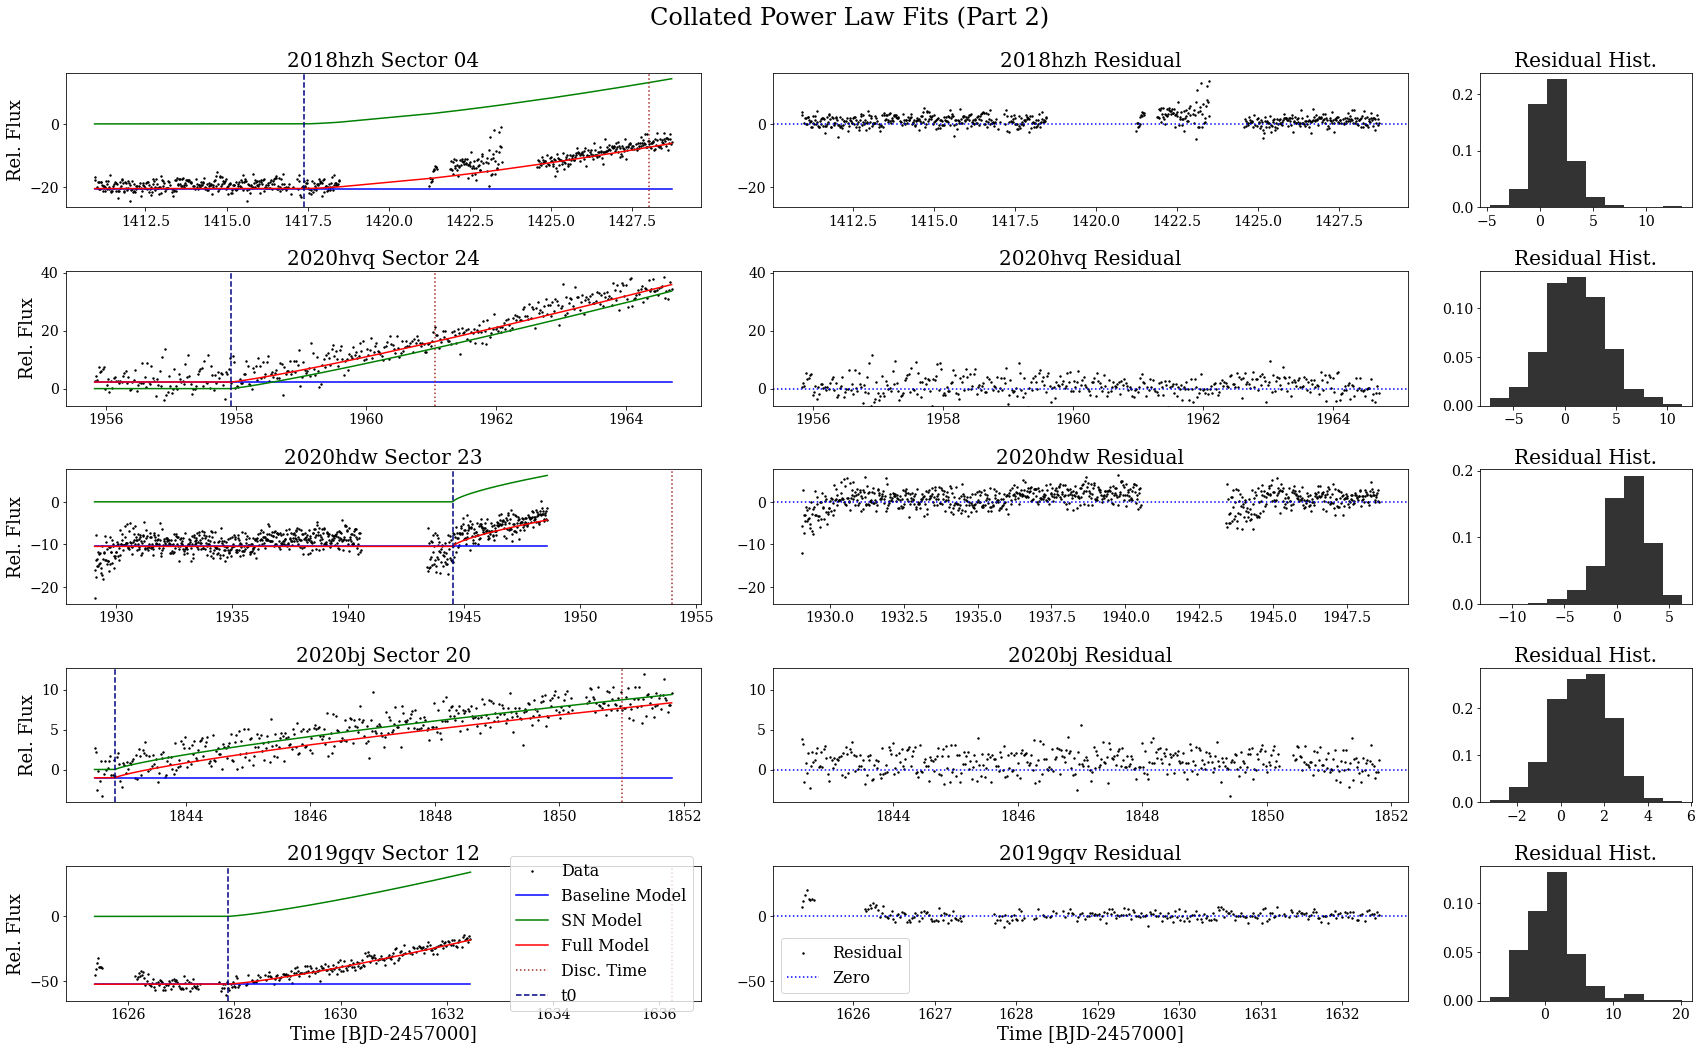

In [3]:
save_dir = "/Users/lindseygordon/research/paper_outputs/4-1-60-run/"
data_dir = "/Users/lindseygordon/research/urop/tessreduce_lc/"
import etsfit.utils.paperplots as pp
pp.big_plot_singlepower(file, data_dir, save_dir, sn_list,
                         filetag="singlepower-0.6", 
                         fraction = 0.6, binning=False)

# 4: Flat fitting for signal comparisons

"Why is the flat fitting type 20?" because i needed to pick an out of the way number.

In [5]:
save_dir = "/Users/lindseygordon/research/paper_outputs/4-1-60-run/"
data_dir = "/Users/lindseygordon/research/urop/tessreduce_lc/"
pipe.run_all_fits(fitType=20, data_dir=data_dir, save_dir=save_dir, TNSFile=file,
                 filekey = "-tessreduce",
                 goodList=sn_list, cbv_dir=None, quaternion_raw_dir=None,
                 quaternion_txt_dir=None, 
                 fraction=0.6, binning=False, n1=5000, n2=20000)

2021bnd 34 1 2
2020tld 29 2 1
saving into folder:  /Users/lindseygordon/research/paper_outputs/4-1-60-run/2020tld2921/flat-0.6/


 30%|███████████                          | 6000/20000 [00:30<01:11, 194.53it/s]


2020flg 23 1 4
2019axj 08 1 2
2018eod 29 2 1
2021egg 35 1 2
2018jwi 06 3 4
2021bsp 17 1 4
2018fzi 02 1 2
2018grv 02 1 4
2018emt 01 1 3
2018hsz 04 3 3
2021gwn 36 2 4
2018hpu 04 3 2
2018hkx 03 4 2
2018hzh 04 3 1
saving into folder:  /Users/lindseygordon/research/paper_outputs/4-1-60-run/2018hzh0431/flat-0.6/


 30%|███████████                          | 6000/20000 [00:17<00:39, 352.50it/s]


2020dcs 22 2 4
2020axk 21 2 2
2020aesr 31 2 2
2020yzo 31 4 3
2020abdk 32 1 2
2018jnd 05 2 3
2018jjd 05 2 1
2020cxe 21 4 4
2020npk 26 1 2
2019bea 07 4 4
2020jxq 25 2 4
2018hka 03 1 4
2020eyf 23 1 2
2020xyw 19 3 2
2021hup 31 4 4
2020ygv 31 4 4
2020yzw 31 1 3
2020abcr 32 3 2
2020zbo 31 2 1
saving into folder:  /Users/lindseygordon/research/paper_outputs/4-1-60-run/2020zbo3121/flat-0.6/


 20%|███████▍                             | 4000/20000 [00:13<00:53, 301.39it/s]


2018hkb 03 1 3
2020hvq 24 2 2
saving into folder:  /Users/lindseygordon/research/paper_outputs/4-1-60-run/2020hvq2422/flat-0.6/


 30%|███████████                          | 6000/20000 [00:17<00:41, 338.04it/s]


2018eph 01 4 1
2018fqn 02 1 4
2019ako 06 4 1
2019bxi 07 3 2
2020aakp 15 2 1
2020xyw 31 4 4
2018fvi 07 4 4
2021bzm 34 1 1
2019dke 10 1 2
2020fqi 23 3 4
2018fwi 02 1 1
2018fub 02 2 1
saving into folder:  /Users/lindseygordon/research/paper_outputs/4-1-60-run/2018fub0221/flat-0.6/


 20%|███████▍                             | 4000/20000 [00:11<00:46, 342.97it/s]


2019nud 15 1 1
2020vem 30 1 2
2020hfk 07 1 4
2019aba 05 3 2
2020abqy 15 1 4
2021iff 34 1 1
2018hib 03 2 2
2020kte 25 1 1
2020aek 20 3 4
2018jmt 05 4 1
2018hyy 04 1 4
2018evo 01 1 1
2020qdi 27 1 2
2021adu 33 3 2
2021dqa 35 1 2
2021bix 34 2 2
2018hdo 03 3 4
2021iff 37 3 3
2020vbs 30 1 1
2020zqo 23 1 1
2020hfk 11 1 1
2020hdw 23 3 3
saving into folder:  /Users/lindseygordon/research/paper_outputs/4-1-60-run/2020hdw2333/flat-0.6/


 25%|█████████▎                           | 5000/20000 [00:15<00:45, 329.82it/s]


2021eng 35 1 3
2020tap 29 1 4
2018exc 01 1 1
saving into folder:  /Users/lindseygordon/research/paper_outputs/4-1-60-run/2018exc0111/flat-0.6/


 15%|█████▌                               | 3000/20000 [00:09<00:52, 323.49it/s]


2019xhk 19 3 2
2020tn 20 1 3
2020aakp 31 4 3
2019pdx 15 2 1
2019ekn 11 1 1
2020uvg 30 1 1
2018eod 01 1 4
2018fvi 02 3 3
2018fhw 01 4 1
saving into folder:  /Users/lindseygordon/research/paper_outputs/4-1-60-run/2018fhw0141/flat-0.6/


 35%|████████████▉                        | 7000/20000 [00:25<00:46, 277.49it/s]


2019sqj 17 1 4
2020awr 21 3 2
2020abjl 32 2 3
2021hfq 36 4 1
2020fcw 23 2 4
2020azn 21 1 2
2021bpo 23 1 3
2018itr 04 3 3
2020wux 30 1 1
2020ftl 19 3 2
2018huc 04 1 1
2019gqv 12 4 2
saving into folder:  /Users/lindseygordon/research/paper_outputs/4-1-60-run/2019gqv1242/flat-0.6/


 20%|███████▍                             | 4000/20000 [00:10<00:41, 383.02it/s]


2021asu 34 1 2
2019wjl 08 1 3
2019wjl 19 3 2
2019wla 18 1 1
2020bj 20 4 2
saving into folder:  /Users/lindseygordon/research/paper_outputs/4-1-60-run/2020bj2042/flat-0.6/


 30%|███████████                          | 6000/20000 [00:18<00:42, 330.25it/s]


2020abqu 32 2 4
2021epv 35 1 2
2020acaa 32 3 2
2020jtg 24 3 1
2020swy 29 2 2


# 5: Retrieve parameters, calculate BIC values:

In [11]:
# get params out: 
params_all_PL = {}
upper_all_PL = {}
lower_all_PL = {}
import etsfit.utils.batch_analyze as ba

for root, dirs, files in os.walk(save_dir):
    for name in files:
        if (name.endswith("singlepower-0.6-output-params.txt")):
            targ = name.split("-")[0]
            filepath = root + "/" + name
            (params,  upper_e, 
                lower_e,  converg) = ba.extract_singlepower_all(filepath)
        
            params_all_PL[targ] = params
            upper_all_PL[targ] = upper_e
            lower_all_PL[targ] = lower_e

params_all_flat = {}
upper_all_flat = {}
lower_all_flat = {}

for root, dirs, files in os.walk(save_dir):
    for name in files:
        if (name.endswith("flat-0.6-output-params.txt")):
            targ = name.split("-")[0]
            filepath = root + "/" + name
            (params,  upper_e, 
                lower_e,  converg) = ba.extract_flat_params(filepath)
        
            params_all_flat[targ] = params
            upper_all_flat[targ] = upper_e
            lower_all_flat[targ] = lower_e
        

In [25]:
ll_flat = {}
ll_pl = {}
BIC_flat = {}
BIC_powerlaw = {}

for key in params_all_flat.keys():
    print(key)
    file = f"{data_dir}{key}/{key}-tessreduce"
    print(file)
    (time, flux, error, targetlabel, 
            sector, camera, ccd) = ut.tr_load_lc(file)
    yerr2 = error**2
    
    #flatmod: 
    model = np.zeros_like(time) + params_all_flat[key]
    s2 = yerr2 + model**2
    ll_flat[key] = -0.5 * np.nansum((flux - model) ** 2 / s2 + np.log(2* np.pi * s2))
    
    #powerlaw: 
    
    t0, A, beta, B = params_all_PL[key]
    time -= time[0]
    t_ = time - t0
    model = (np.heaviside((t_), 1) * A * np.nan_to_num((t_**beta))) + 1 + B
    s2 = yerr2 + model**2
    ll_pl[key] = -0.5 * np.nansum((flux - model) ** 2 / s2 + np.log(2* np.pi *s2))
    
    BIC_flat[key] = 1 * np.log(len(time)) - 2*ll_flat[key]
    BIC_powerlaw[key] = 4 * np.log(len(time)) - 2 * ll_pl[key]

2020tld2921
/Users/lindseygordon/research/urop/tessreduce_lc/2020tld2921/2020tld2921-tessreduce
2020tld 29 2 1
2018hzh0431
/Users/lindseygordon/research/urop/tessreduce_lc/2018hzh0431/2018hzh0431-tessreduce
2018hzh 04 3 1
2020zbo3121
/Users/lindseygordon/research/urop/tessreduce_lc/2020zbo3121/2020zbo3121-tessreduce
2020zbo 31 2 1
2020hvq2422
/Users/lindseygordon/research/urop/tessreduce_lc/2020hvq2422/2020hvq2422-tessreduce
2020hvq 24 2 2
2018fub0221
/Users/lindseygordon/research/urop/tessreduce_lc/2018fub0221/2018fub0221-tessreduce
2018fub 02 2 1
2020hdw2333
/Users/lindseygordon/research/urop/tessreduce_lc/2020hdw2333/2020hdw2333-tessreduce
2020hdw 23 3 3
2018exc0111
/Users/lindseygordon/research/urop/tessreduce_lc/2018exc0111/2018exc0111-tessreduce
2018exc 01 1 1
2018fhw0141
/Users/lindseygordon/research/urop/tessreduce_lc/2018fhw0141/2018fhw0141-tessreduce
2018fhw 01 4 1
2019gqv1242
/Users/lindseygordon/research/urop/tessreduce_lc/2019gqv1242/2019gqv1242-tessreduce
2019gqv 12 4 2
2

In [44]:
# make table for paper: 
pref = ["Flat", "PL"]
for key in params_all_PL:
    t0, A, beta, B = params_all_PL[key]
    b2 = params_all_flat[key]
    print(f"{key[:-4]} & {t0:.2f} & {A:.2f} & {beta:.2f} & {B:.2f} \
    & {b2:.2f} & {pref[np.argmin((BIC_flat[key], BIC_powerlaw[key]))]}")

2020tld & 15.52 & 4.29 & 1.25 & 7.00    & 19.11 & PL \ \ 
2018hzh & 6.46 & 0.48 & 1.40 & -20.35    & -15.35 & PL \ \ 
2020zbo & 3.12 & 1.68 & 0.89 & -10.28    & -6.37 & Flat \ \ 
2020hvq & 2.10 & 3.78 & 1.14 & 2.27    & 16.45 & PL \ \ 
2018fub & 5.98 & 0.39 & 1.84 & -24.71    & -20.39 & PL \ \ 
2020hdw & 16.39 & 2.36 & 0.69 & -10.47    & -8.51 & Flat \ \ 
2018exc & 12.25 & 1.32 & 1.33 & -28.76    & -24.05 & Flat \ \ 
2018fhw & 18.84 & 0.33 & 2.19 & 1.21    & 2.92 & PL \ \ 
2019gqv & 2.90 & 5.04 & 1.26 & -52.22    & -37.24 & Flat \ \ 
2020bj & 0.33 & 1.69 & 0.78 & -1.04    & 3.98 & Flat \ \ 
